In [1]:
from google.colab import files
uploaded = files.upload()

Saving train_vgg_19.p to train_vgg_19 (2).p
Saving valid_vgg_19.p to valid_vgg_19 (1).p


In [2]:
import numpy as np
import pickle
import keras.utils as utils
from keras.models import Model
from keras.layers import Dense, Dropout, Input
from keras import regularizers
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

Using TensorFlow backend.


# Training a NN Classifier on top of VGG-19

The general idea here is to use transfer learning approach. Inputs to the model are image representations in the form of vectors of length 4096, which are obtained after propagating images through a VGG-19 model pretrained on Imagenet and taking the outputs of its last layer before classification.

Using these features we'll now try to classify the images into two classes: "good" cars and "damaged" cars with a Neural Network, which is built on top of cut VGG-19. First, we try a single layer with two outputs and softmax activation. Second, we try a NN with several hidden layers.

In [0]:
def plot_training_history(training_history, epochs_num):
  plt.subplot(211)
  plt.plot(np.arange(1, epochs_num + 1), training_history.history["loss"], label='train dataset')
  plt.plot(np.arange(1, epochs_num + 1), training_history.history["val_loss"], label='validation dataset')
  plt.title('Loss plot')
  plt.xlabel('epoch')
  plt.ylabel('cross entropy')
  plt.legend()
  plt.show()
  plt.subplot(212)
  plt.plot(np.arange(1, epochs_num + 1), training_history.history["acc"], label='train dataset')
  plt.plot(np.arange(1, epochs_num + 1), training_history.history["val_acc"], label='validation dataset')
  plt.title('Accuracy plot')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

In [0]:
def display_metrics(true_labels, predicted_labels, labels):
    print("Accuracy:", accuracy_score(true_labels, predicted_labels))
    print("\nConfusion matrix")
    display(DataFrame(confusion_matrix(true_labels, predicted_labels),
                      index=["Actual " + label for label in labels], columns=["Predicted " + label for label in labels]))
    print("\nPrecision, recall, F-score, support")
    display(DataFrame(np.array(precision_recall_fscore_support(true_labels, predicted_labels)),
            index=("precision", "recall", "F-score", "support"), columns=labels))

In [0]:
train_cars, train_labels = pickle.loads(uploaded['train_vgg_19.p'])
input_shape = train_cars[0].shape
valid_cars, valid_labels = pickle.loads(uploaded['valid_vgg_19.p'])

In [0]:
train_labels_probabilities = utils.to_categorical(train_labels)
valid_labels_probabilities = utils.to_categorical(valid_labels)

## Single layer

First let's try to train a softmax linear classifier.

In [0]:
x = Input(shape=(input_shape))
y = Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.01))(x)
single_layer_model = Model(x, y)
single_layer_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
single_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4096)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 8194      
Total params: 8,194
Trainable params: 8,194
Non-trainable params: 0
_________________________________________________________________


In [9]:
training_history = single_layer_model.fit(train_cars, train_labels_probabilities, batch_size=256, epochs=35, validation_data=(valid_cars, valid_labels_probabilities))

Train on 6514 samples, validate on 814 samples
Epoch 1/35
6514/6514 [==============================] - 1s 147us/step - loss: 0.4821 - acc: 0.7895 - val_loss: 0.3129 - val_acc: 0.9017
Epoch 2/35
6514/6514 [==============================] - 0s 29us/step - loss: 0.2660 - acc: 0.9197 - val_loss: 0.2349 - val_acc: 0.9238
Epoch 3/35
6514/6514 [==============================] - 0s 29us/step - loss: 0.2202 - acc: 0.9355 - val_loss: 0.2137 - val_acc: 0.9410
Epoch 4/35
6514/6514 [==============================] - 0s 30us/step - loss: 0.2051 - acc: 0.9377 - val_loss: 0.1958 - val_acc: 0.9361
Epoch 5/35
6514/6514 [==============================] - 0s 29us/step - loss: 0.1914 - acc: 0.9447 - val_loss: 0.1841 - val_acc: 0.9447
Epoch 6/35
6514/6514 [==============================] - 0s 28us/step - loss: 0.1815 - acc: 0.9498 - val_loss: 0.1784 - val_acc: 0.9459
Epoch 7/35
6514/6514 [==============================] - 0s 28us/step - loss: 0.1755 - acc: 0.9506 - val_loss: 0.1720 - val_acc: 0.9570
Epoch 8

6514/6514 [==============================] - 0s 31us/step - loss: 0.1552 - acc: 0.9595 - val_loss: 0.1504 - val_acc: 0.9607
Epoch 16/35
6514/6514 [==============================] - 0s 28us/step - loss: 0.1533 - acc: 0.9567 - val_loss: 0.1505 - val_acc: 0.9558
Epoch 17/35
6514/6514 [==============================] - 0s 30us/step - loss: 0.1497 - acc: 0.9595 - val_loss: 0.1483 - val_acc: 0.9595
Epoch 18/35
6514/6514 [==============================] - 0s 30us/step - loss: 0.1522 - acc: 0.9555 - val_loss: 0.1473 - val_acc: 0.9619
Epoch 19/35
6514/6514 [==============================] - 0s 29us/step - loss: 0.1496 - acc: 0.9561 - val_loss: 0.1463 - val_acc: 0.9631
Epoch 20/35
6514/6514 [==============================] - 0s 31us/step - loss: 0.1500 - acc: 0.9587 - val_loss: 0.1456 - val_acc: 0.9619
Epoch 21/35
6514/6514 [==============================] - 0s 31us/step - loss: 0.1464 - acc: 0.9592 - val_loss: 0.1472 - val_acc: 0.9521
Epoch 22/35
6514/6514 [==============================] - 0s 

6514/6514 [==============================] - 0s 31us/step - loss: 0.1456 - acc: 0.9592 - val_loss: 0.1403 - val_acc: 0.9644
Epoch 30/35
6514/6514 [==============================] - 0s 30us/step - loss: 0.1385 - acc: 0.9627 - val_loss: 0.1410 - val_acc: 0.9595
Epoch 31/35
6514/6514 [==============================] - 0s 30us/step - loss: 0.1376 - acc: 0.9619 - val_loss: 0.1420 - val_acc: 0.9582
Epoch 32/35
6514/6514 [==============================] - 0s 30us/step - loss: 0.1405 - acc: 0.9609 - val_loss: 0.1414 - val_acc: 0.9558
Epoch 33/35
6514/6514 [==============================] - 0s 29us/step - loss: 0.1378 - acc: 0.9596 - val_loss: 0.1444 - val_acc: 0.9521
Epoch 34/35
6514/6514 [==============================] - 0s 31us/step - loss: 0.1355 - acc: 0.9632 - val_loss: 0.1378 - val_acc: 0.9644
Epoch 35/35
6514/6514 [==============================] - 0s 30us/step - loss: 0.1383 - acc: 0.9621 - val_loss: 0.1382 - val_acc: 0.9656


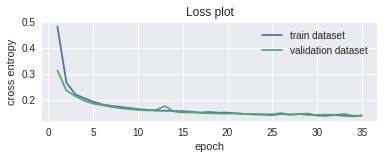

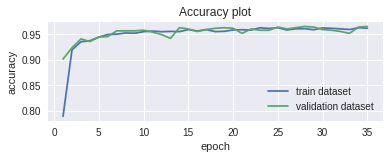

In [10]:
plot_training_history(training_history, 35)

As can be seen from the plot, loss on the train set is steadily decresing, but loss on the validation set is slightly flunctuating around it.

Here is an example of predicted probabilities.

In [11]:
print(single_layer_model.predict(np.expand_dims(train_cars[0],axis=0)))

[[0.05517596 0.94482404]]


Let's look at the metrics on the training dataset.

In [12]:
predicted_labels = single_layer_model.predict(train_cars).argmax(axis=-1)
display_metrics(train_labels, predicted_labels, ("Good Cars", "Damaged Cars"))

Accuracy: 0.9625422167638932

Confusion matrix


,Predicted Good Cars,Predicted Damaged Cars
Actual Good Cars,3027,171
Actual Damaged Cars,73,3243



Precision, recall, F-score, support


,Good Cars,Damaged Cars
precision,0.976452,0.949912
recall,0.946529,0.977986
F-score,0.961258,0.963744
support,3198.000000,3316.000000


Now for the validation dataset.

In [13]:
predicted_labels_valid = single_layer_model.predict(valid_cars).argmax(axis=-1)
display_metrics(valid_labels, predicted_labels_valid, ("Good Cars", "Damaged Cars"))

Accuracy: 0.9656019656019657

Confusion matrix


,Predicted Good Cars,Predicted Damaged Cars
Actual Good Cars,373,20
Actual Damaged Cars,8,413



Precision, recall, F-score, support


,Good Cars,Damaged Cars
precision,0.979003,0.953811
recall,0.949109,0.980998
F-score,0.963824,0.967213
support,393.000000,421.000000


The results are consistent.

## Multiple layers

Let's add to the model one more intermediate dense layer followed by a dropout layer for regularisation.

In [0]:
x = Input(shape=(input_shape))
z = Dense(512, activation='relu')(x)
z = Dropout(0.5)(z)
y = Dense(2, activation='softmax')(z)
multiple_layer_model = Model(x, y)
multiple_layer_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
multiple_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               2097664   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 2,098,690
Trainable params: 2,098,690
Non-trainable params: 0
_________________________________________________________________


In [16]:
training_history = multiple_layer_model.fit(train_cars, train_labels_probabilities, batch_size=256, epochs=25, validation_data=(valid_cars, valid_labels_probabilities))

Train on 6514 samples, validate on 814 samples
Epoch 1/25
6514/6514 [==============================] - 1s 94us/step - loss: 1.8257 - acc: 0.6251 - val_loss: 0.2566 - val_acc: 0.9177
Epoch 2/25
6514/6514 [==============================] - 0s 47us/step - loss: 0.2633 - acc: 0.8985 - val_loss: 0.1913 - val_acc: 0.9251
Epoch 3/25
6514/6514 [==============================] - 0s 47us/step - loss: 0.2054 - acc: 0.9226 - val_loss: 0.1714 - val_acc: 0.9312
Epoch 4/25
6514/6514 [==============================] - 0s 46us/step - loss: 0.1809 - acc: 0.9337 - val_loss: 0.1568 - val_acc: 0.9337
Epoch 5/25
6514/6514 [==============================] - 0s 45us/step - loss: 0.1661 - acc: 0.9404 - val_loss: 0.1501 - val_acc: 0.9410
Epoch 6/25
6514/6514 [==============================] - 0s 44us/step - loss: 0.1510 - acc: 0.9444 - val_loss: 0.1301 - val_acc: 0.9521
Epoch 7/25
6514/6514 [==============================] - 0s 46us/step - loss: 0.1478 - acc: 0.9450 - val_loss: 0.1231 - val_acc: 0.9533
Epoch 8/

6514/6514 [==============================] - 0s 47us/step - loss: 0.1139 - acc: 0.9584 - val_loss: 0.0990 - val_acc: 0.9656
Epoch 16/25
6514/6514 [==============================] - 0s 46us/step - loss: 0.1111 - acc: 0.9601 - val_loss: 0.1067 - val_acc: 0.9521
Epoch 17/25
6514/6514 [==============================] - 0s 46us/step - loss: 0.1057 - acc: 0.9602 - val_loss: 0.1030 - val_acc: 0.9545
Epoch 18/25
6514/6514 [==============================] - 0s 46us/step - loss: 0.1153 - acc: 0.9586 - val_loss: 0.1215 - val_acc: 0.9570
Epoch 19/25
6514/6514 [==============================] - 0s 46us/step - loss: 0.1188 - acc: 0.9536 - val_loss: 0.1075 - val_acc: 0.9545
Epoch 20/25
6514/6514 [==============================] - 0s 46us/step - loss: 0.1219 - acc: 0.9566 - val_loss: 0.1389 - val_acc: 0.9398
Epoch 21/25
6514/6514 [==============================] - 0s 46us/step - loss: 0.1145 - acc: 0.9581 - val_loss: 0.1201 - val_acc: 0.9472
Epoch 22/25
6514/6514 [==============================] - 0s 

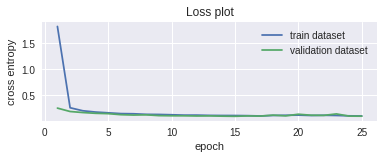

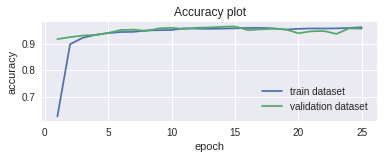

In [17]:
plot_training_history(training_history, 25)

Let's look at the metrics on the training dataset.

In [18]:
predicted_labels = multiple_layer_model.predict(train_cars).argmax(axis=-1)
display_metrics(train_labels, predicted_labels, ("Good Cars", "Damaged Cars"))

Accuracy: 0.9679152594412036

Confusion matrix


,Predicted Good Cars,Predicted Damaged Cars
Actual Good Cars,3112,86
Actual Damaged Cars,123,3193



Precision, recall, F-score, support


,Good Cars,Damaged Cars
precision,0.961978,0.973772
recall,0.973108,0.962907
F-score,0.967511,0.968309
support,3198.000000,3316.000000


Now for the validation dataset.

In [19]:
predicted_labels_valid = multiple_layer_model.predict(valid_cars).argmax(axis=-1)
display_metrics(valid_labels, predicted_labels_valid, ("Good Cars", "Damaged Cars"))

Accuracy: 0.957002457002457

Confusion matrix


,Predicted Good Cars,Predicted Damaged Cars
Actual Good Cars,379,14
Actual Damaged Cars,21,400



Precision, recall, F-score, support


,Good Cars,Damaged Cars
precision,0.947500,0.966184
recall,0.964377,0.950119
F-score,0.955864,0.958084
support,393.000000,421.000000


Two models yield more or less equal results, but the first one is simpler. So it makes sense to pick it.

Let's save the weights for the single layer model.

In [0]:
single_layer_model.save_weights('vgg19_single_layer_model_loss_0.1383.h5')

files.download('vgg19_single_layer_model_loss_0.1383.h5')